In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
from pylab import mpl, plt
import scienceplots

In [6]:
dataset  = yf.download(['FCX','HG=F'])
df = pd.DataFrame()
df['price'] = dataset['Adj Close']['FCX']

[*********************100%***********************]  2 of 2 completed


<AxesSubplot:xlabel='Date'>

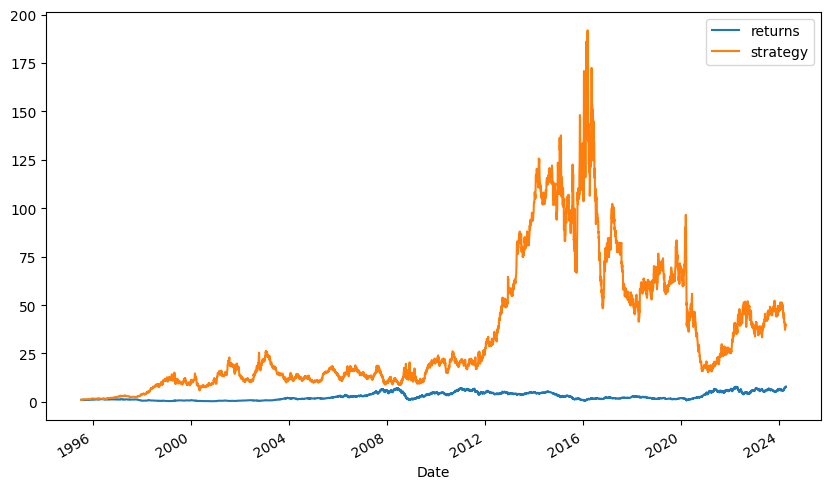

In [8]:
df['returns'] = np.log(df['price']/df['price'].shift(1))
df['position'] = np.sign(df['returns'])
df['strategy'] = df['position'].shift(1) * df['returns']
df[['returns','strategy']].dropna().cumsum().apply(np.exp).plot(figsize=(10,6))

<AxesSubplot:xlabel='Date'>

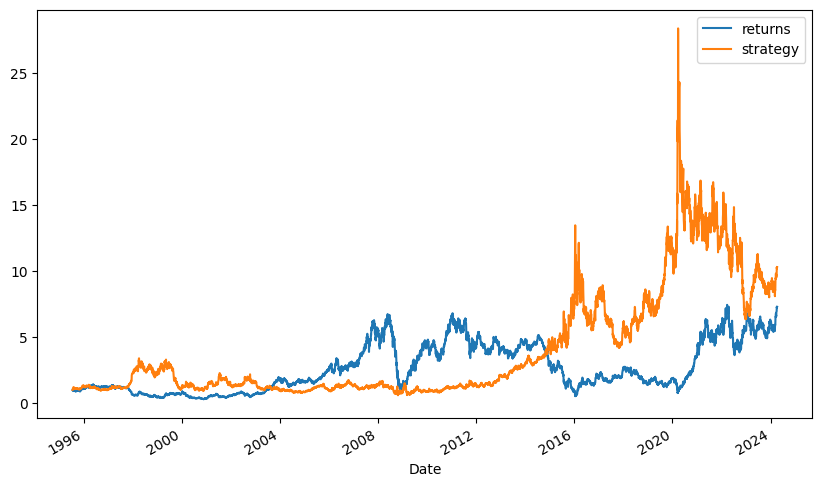

In [10]:
df['position'] = np.sign(df['returns'].rolling(3).mean())
df['strategy'] = df['position'].shift(1) * df['returns']
df[['returns','strategy']].dropna().cumsum().apply(np.exp).plot(figsize=(10,6))

<AxesSubplot:xlabel='Date'>

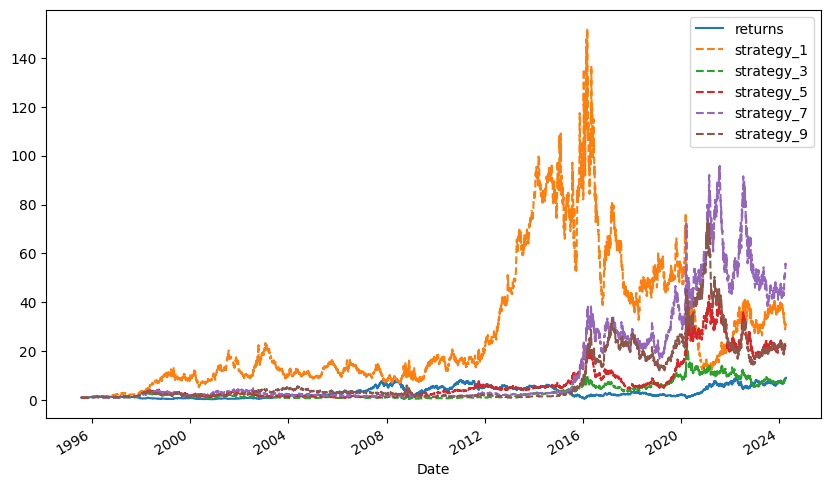

In [15]:
to_plot = ['returns']

for m in [1,3,5,7,9]:
    df[f'position_{m}'] = np.sign(df['returns'].rolling(m).mean())
    df[f'strategy_{m}'] = (df[f'position_{m}'].shift(1) * df['returns'])
    to_plot.append(f'strategy_{m}')

df[to_plot].dropna().cumsum().apply(np.exp).plot(figsize=(10,6),style=['-','--','--','--','--','--'])